**Machine Learning Assignment 1<br>
Sam Kauffman<br>
CS430<br>
Machine Learning in the Cloud**

In [1]:
import pandas as pd

# 1.

In [2]:
df = pd.read_csv('/content/weather_2012.csv')

# 2.

In [3]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [5]:
df.sample(n=5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8677,2012-12-27 13:00:00,-5.4,-6.7,91,48,0.6,100.36,"Snow,Blowing Snow"
555,2012-01-24 03:00:00,5.0,3.6,91,19,9.7,100.19,Rain
5759,2012-08-27 23:00:00,22.5,19.1,81,22,25.0,100.59,Mostly Cloudy
4244,2012-06-25 20:00:00,15.2,11.3,78,11,24.1,100.12,Cloudy
4163,2012-06-22 11:00:00,24.7,17.3,63,22,24.1,100.41,Mostly Cloudy


# 3.

In [6]:
df.select_dtypes(include=['number','object']).columns

Index(['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

# 4.

In [7]:
new_names = {
    'Temp (C)': 'temp_c',
    'Dew Point Temp (C)': 'dew_point',
    'Rel Hum (%)': 'relative_humidity',
    'Wind Spd (km/h)': 'wind_speed',
    'Visibility (km)': 'visibility',
    'Stn Press (kPa)': 'pressure',
    'Weather': 'weather'
}

df = df.rename(columns=new_names)
df.select_dtypes(include=['number','object']).columns

Index(['Date/Time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed',
       'visibility', 'pressure', 'weather'],
      dtype='object')

# 5.

In [8]:
stats = df.describe()
print(stats)


            temp_c    dew_point  relative_humidity   wind_speed   visibility  \
count  8784.000000  8784.000000        8784.000000  8784.000000  8784.000000   
mean      8.798144     2.555294          67.431694    14.945469    27.664447   
std      11.687883    10.883072          16.918881     8.688696    12.622688   
min     -23.300000   -28.500000          18.000000     0.000000     0.200000   
25%       0.100000    -5.900000          56.000000     9.000000    24.100000   
50%       9.300000     3.300000          68.000000    13.000000    25.000000   
75%      18.800000    11.800000          81.000000    20.000000    25.000000   
max      33.000000    24.400000         100.000000    83.000000    48.300000   

          pressure  
count  8784.000000  
mean    101.051623  
std       0.844005  
min      97.520000  
25%     100.560000  
50%     101.070000  
75%     101.590000  
max     103.650000  


# 6.

In [9]:
df['temp_f'] = ( df['temp_c'] * 9/5) + 32
df.head()

,Date/Time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather,temp_f
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30


# 7.

In [10]:
new_columns = df.columns.tolist()
new_columns.remove('temp_f')
new_columns.insert(1, 'temp_f')
df = df[new_columns]

print(df)

                Date/Time  temp_f  temp_c  dew_point  relative_humidity  \
0     2012-01-01 00:00:00   28.76    -1.8       -3.9                 86   
1     2012-01-01 01:00:00   28.76    -1.8       -3.7                 87   
2     2012-01-01 02:00:00   28.76    -1.8       -3.4                 89   
3     2012-01-01 03:00:00   29.30    -1.5       -3.2                 88   
4     2012-01-01 04:00:00   29.30    -1.5       -3.3                 88   
...                   ...     ...     ...        ...                ...   
8779  2012-12-31 19:00:00   32.18     0.1       -2.7                 81   
8780  2012-12-31 20:00:00   32.36     0.2       -2.4                 83   
8781  2012-12-31 21:00:00   31.10    -0.5       -1.5                 93   
8782  2012-12-31 22:00:00   31.64    -0.2       -1.8                 89   
8783  2012-12-31 23:00:00   32.00     0.0       -2.1                 86   

      wind_speed  visibility  pressure               weather  
0              4         8.0    101.

# 8.

In [11]:
print(df.dtypes)


Date/Time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object


# 9.

In [12]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

print(df['Date/Time'].dtype)

datetime64[ns]


# 10.

In [32]:
df.set_index('Date/Time', inplace=True)
monthly_avg = df.resample('M')['temp_f'].mean()
df.reset_index(inplace=True)
print(monthly_avg.head())
monthly_avg.head()


Date/Time
2012-01-31    18.731290
2012-02-29    24.395000
2012-03-31    37.618226
2012-04-30    44.616750
2012-05-31    61.227984
Freq: M, Name: temp_f, dtype: float64


,temp_f
Date/Time,
2012-01-31,18.731290
2012-02-29,24.395000
2012-03-31,37.618226
2012-04-30,44.616750
2012-05-31,61.227984


# 11.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Humidity')

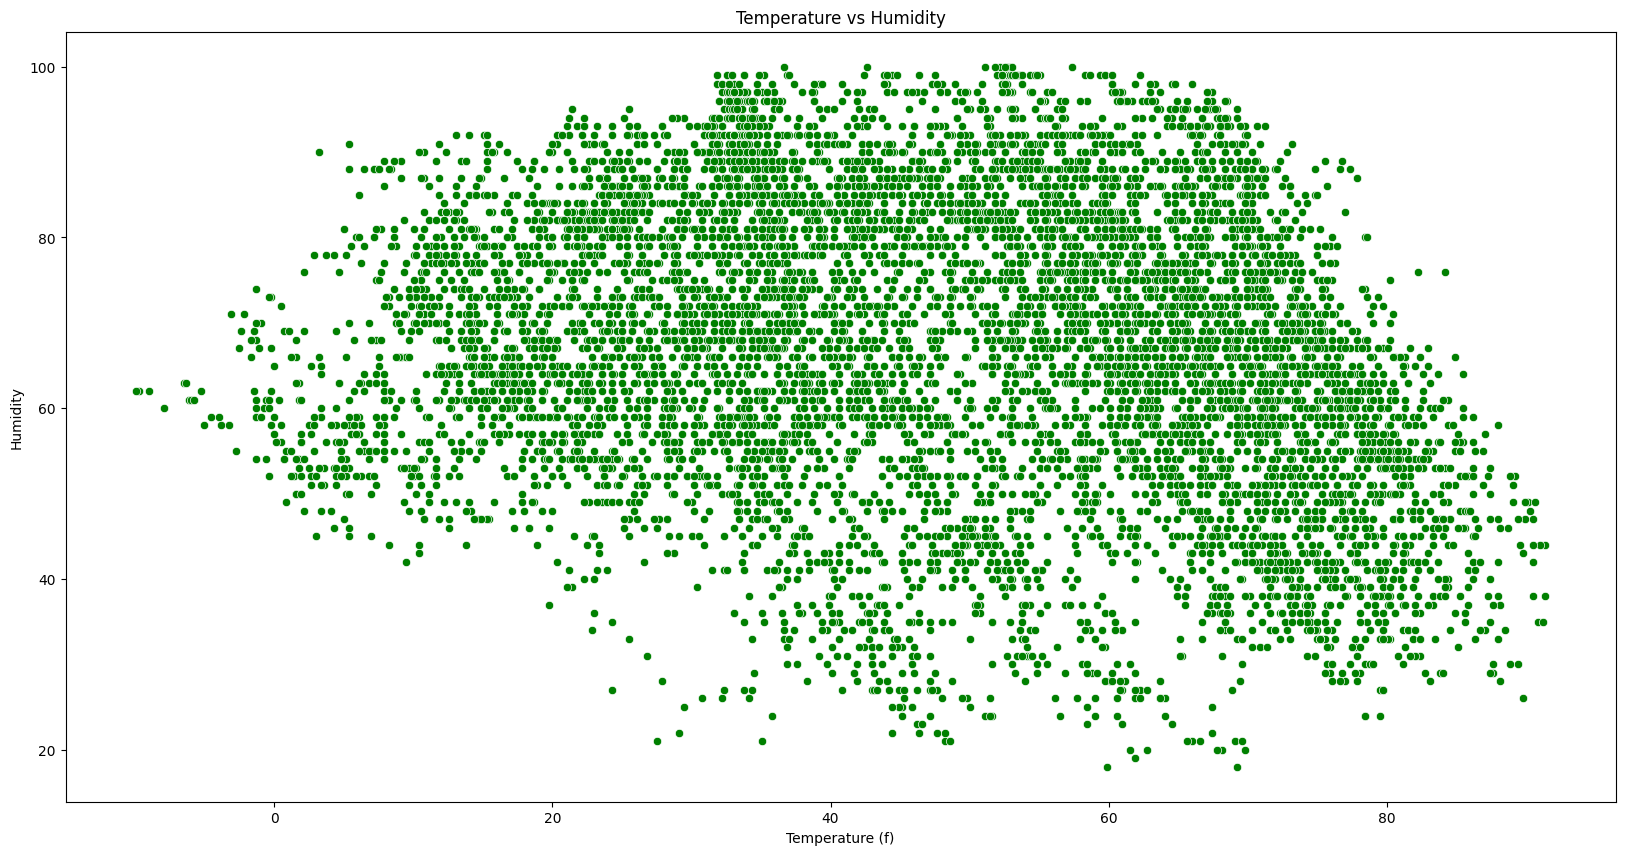

In [28]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x ='temp_f', y ='relative_humidity', color = 'green')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (f)')
plt.ylabel('Humidity')

# 12.

Text(0, 0.5, 'Temperature (f)')

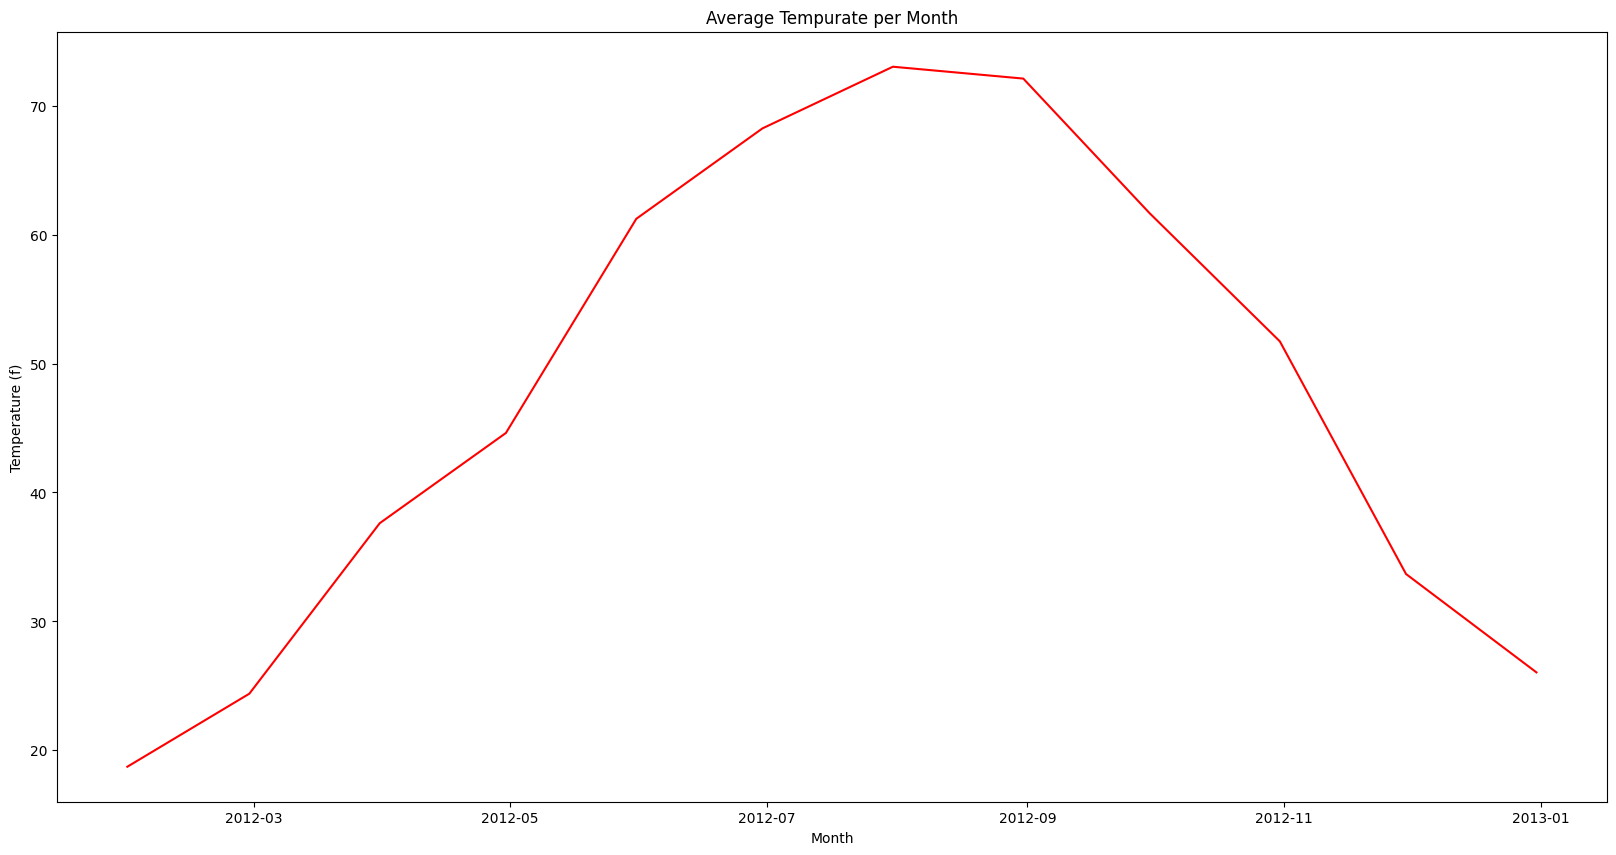

In [36]:
plt.figure(figsize=(20,10))
sns.lineplot(data=monthly_avg.reset_index(), x = 'Date/Time', y= 'temp_f', color= 'red')
plt.title('Average Tempurate per Month')
plt.xlabel('Month')
plt.ylabel('Temperature (f)')

# 13.

<Axes: >

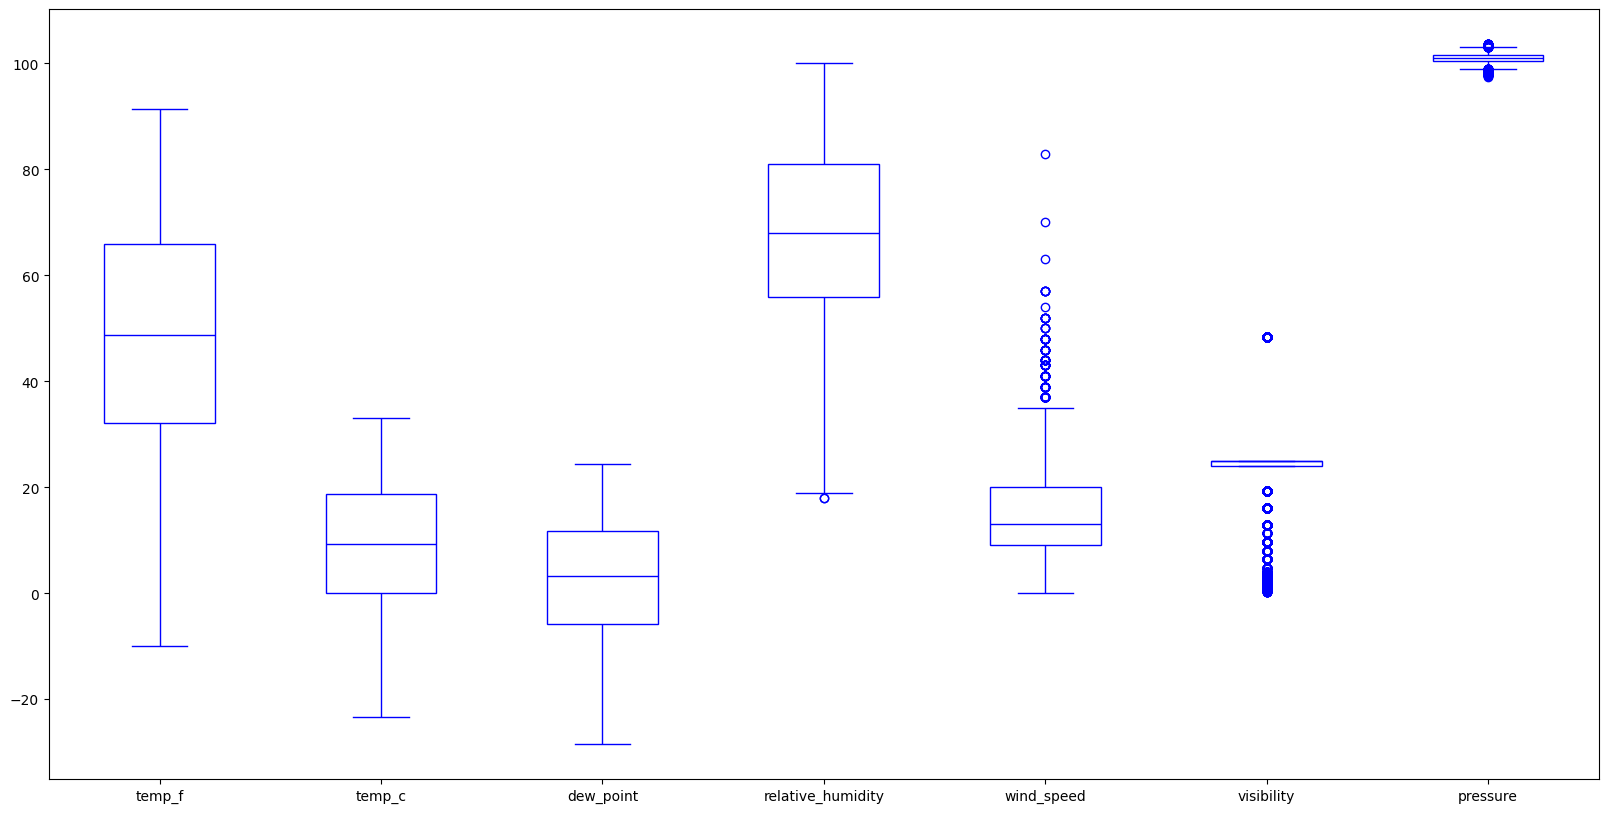

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, color = 'white', linecolor='blue', width=.5)